# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [177]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [178]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [179]:
#Define the function "say_hello" so it prints "Hello!" when called.
def say_hello():
    print("Hello World!")
say_hello()


Hello World!


### Merge the DataFrames

In [180]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [181]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [182]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

## Deliverable 1: Get a Summary DataFrame 

In [183]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["driver_count"]

total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64

In [184]:
# 2. Get the total drivers for each city type
total_driver_by_city = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_by_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [185]:
#  3. Get the total amount of fares for each city type
fare_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [186]:
#4. Get the average fare per ride for each city type. 
fareAvg_by_city_type = pyber_data_df.groupby(["type"]).mean()["fare"]
fareAvg_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [187]:
# 5. Get the average fare per driver for each city type. 
driver_avg_fare_city = (pyber_data_df.groupby(["ride_id"]).mean()["fare"], pyber_data_df.groupby(["type"]).mean()["fare"])
driver_avg_fare_city


(ride_id
 3.218337e+08    48.20
 1.506044e+09    40.87
 1.458810e+10    38.95
 1.650777e+10    41.95
 1.858656e+10    26.10
                 ...  
 9.975080e+12    23.35
 9.979820e+12    11.06
 9.988470e+12    31.89
 9.990580e+12    55.84
 9.991540e+12    21.46
 Name: fare, Length: 2371, dtype: float64,
 type
 Rural       34.623440
 Suburban    30.970128
 Urban       24.525772
 Name: fare, dtype: float64)

In [188]:
#  6. Create a PyBer summary DataFrame. 
# Create a DataFrame
pyber_summary_df = pd.DataFrame([{
    "total_rides": total_rides_by_type,
    "total_drivers": total_driver_by_city,
    "total fares":fare_by_city_type,
    "average fare per ride": fareAvg_by_city_type,
    "average fare per driver":driver_avg_fare_city }])
# Display the data frame
pyber_summary_df.head()

,total_rides,total_drivers,total fares,average fare per ride,average fare per driver
0,type Rural 125 Suburban 625 Urban ...,type Rural 78 Suburban 490 Urban ...,type Rural 4327.93 Suburban 19356.33...,type Rural 34.623440 Suburban 30.9701...,"([48.2, 40.87, 38.95, 41.95, 26.1, 18.92, 33.9..."


In [189]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   total_rides              1 non-null      object
 1   total_drivers            1 non-null      object
 2   total fares              1 non-null      object
 3   average fare per ride    1 non-null      object
 4   average fare per driver  1 non-null      object
dtypes: object(5)
memory usage: 168.0+ bytes


In [190]:
#  8. Format the columns.
pyber_summary_df = pd.DataFrame([{
               "rides": total_rides_by_type,
    "drivers": total_driver_by_city,
    "fares":fare_by_city_type,
    "avg fare per ride": fareAvg_by_city_type,
    "avg fare per driver":driver_avg_fare_city }])
pyber_summary_df.head()

,rides,drivers,fares,avg fare per ride,avg fare per driver
0,type Rural 125 Suburban 625 Urban ...,type Rural 78 Suburban 490 Urban ...,type Rural 4327.93 Suburban 19356.33...,type Rural 34.623440 Suburban 30.9701...,"([48.2, 40.87, 38.95, 41.95, 26.1, 18.92, 33.9..."


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [233]:
# 1. Read the merged DataFrame
#ride_data_df = pd.read_csv(ride_data_to_load)
#ride_data_df.head(10)

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [234]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# Combine the data into a single dataset
pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
New_dataframe_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
# Display the data table for preview
New_dataframe_df.head()

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26

In [235]:
pyber_data_df = pyber_data_df
#importing pandas package
#import pandas as pd
# making data frame from csv file
#data = pd.read_csv("employees.csv")
# setting first name as index column
#data.set_index(["First Name"], inplace = True,append = True, drop = True)
# resetting index
#data.reset_index(inplace = True)
# display
#data.head()
#https://www.geeksforgeeks.org/python-pandas-dataframe-reset_index/



In [236]:
# 3a. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()before reset
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [237]:
# 3b. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()after reset
pyber_data_df = pyber_data_df.reset_index()
pyber_data_df

,index,city,date,fare,ride_id,driver_count,type
0,0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...,...
2370,2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [238]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         2375 non-null   int64  
 1   city          2375 non-null   object 
 2   date          2375 non-null   object 
 3   fare          2375 non-null   float64
 4   ride_id       2375 non-null   float64
 5   driver_count  2375 non-null   int64  
 6   type          2375 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 130.0+ KB


In [239]:
pyber_data_pivot = pyber_data_df.groupby(['city','date']).sum()[['fare']]
pyber_data_pivot.tail(10)

fare
city         date                  
Williamsview 3/2/2019 22:23   25.15
             3/22/2019 22:31  15.85
             4/11/2019 20:41  33.68
             4/15/2019 16:09  44.74
             4/16/2019 8:23   20.38
             4/18/2019 2:07   39.79
             4/26/2019 0:30   20.89
             4/7/2019 0:32    18.92
             4/7/2019 2:32    19.19
             5/4/2019 14:56   32.80

In [240]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
#hide Hine dataframe.pivot()
#(piviot table with date as index) (columns = 'type'), (values = 'fare')
pyber_data_pivot=pyber_data_pivot.reset_index('city')
pyber_data_pivot.tail(10)

,city,fare
date,,
3/2/2019 22:23,Williamsview,25.15
3/22/2019 22:31,Williamsview,15.85
4/11/2019 20:41,Williamsview,33.68
4/15/2019 16:09,Williamsview,44.74
4/16/2019 8:23,Williamsview,20.38
4/18/2019 2:07,Williamsview,39.79
4/26/2019 0:30,Williamsview,20.89
4/7/2019 0:32,Williamsview,18.92
4/7/2019 2:32,Williamsview,19.19


In [ ]:
pyber_data_pivot=pyber_data_pivot.reset_index('city')
pyber_data_pivot.tail(10)

In [248]:
#pyber_data_pivot=pyber_data_pivot.reset_index('city')
#pyber_data_pivot.tail(10)

In [249]:
pyber_data_pivot.index = pd.to_datetime(pyber_data_pivot.index)

In [250]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#(new data frame using loc.new data frame.df) 
#Mod4 student_data_df.loc[student_data_df['gender'] == 'F', 'student_name']

pyber_data_pivot.loc['2019-01-01':'2019-04-29']
new_DataFrame = pyber_data_pivot.loc['2019-01-01':'2019-04-29']
new_DataFrame


C:\Users\Frank.sullivan\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """
C:\Users\Frank.sullivan\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


,city,fare
date,,
2019-01-11 02:22:00,Amandaburgh,29.24
2019-01-13 16:04:00,Amandaburgh,23.35
2019-01-02 09:57:00,Amandaburgh,33.06
2019-01-21 04:12:00,Amandaburgh,9.26
2019-01-29 23:28:00,Amandaburgh,41.06
...,...,...
2019-04-16 08:23:00,Williamsview,20.38
2019-04-18 02:07:00,Williamsview,39.79
2019-04-26 00:30:00,Williamsview,20.89


In [252]:
#new_DataFrame2 = new_DataFrame.pivot(index='date', columns='type', values='fare')

In [215]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
#StackOverflow
#Convert to date time
#DatetimeIndex: number of entries, 2019-01-01 to 2019-04-29



In [216]:
# 7. Check that the datatype for the index is datetime using df.info()
new_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-11 02:22:00 to 2019-04-07 02:32:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    2218 non-null   object 
 1   fare    2218 non-null   float64
dtypes: float64(1), object(1)
memory usage: 52.0+ KB


In [217]:
# 8a. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
#Google panada.DataFrame.resample
#Convenience method for frequency conversion and resampling of time series. 
#The object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), 
#or the caller must pass the label of a datetime-like series/index to the on/level keyword parameter.

index = pd.date_range('2019-01-01', periods=9, freq='W')
series = pd.Series(range(9), index=index)
series


2019-01-06    0
2019-01-13    1
2019-01-20    2
2019-01-27    3
2019-02-03    4
2019-02-10    5
2019-02-17    6
2019-02-24    7
2019-03-03    8
Freq: W-SUN, dtype: int64

In [218]:
# 1. resample only works when you have a datetime index
# 2. resample works similarly to groupby
# new_DataFrame.groupby('city')['fare'].sum() # sum of fares for each city
# new_DataFrame.groupby('city')

In [219]:
new_DataFrame.resample("W")['fare'].sum()
George=new_DataFrame.resample("W")['fare'].sum()
George

date
2019-01-06    2571.20
2019-01-13    3223.21
2019-01-20    3463.22
2019-01-27    3512.48
2019-02-03    3462.81
2019-02-10    3252.78
2019-02-17    3376.39
2019-02-24    4298.09
2019-03-03    3251.80
2019-03-10    3700.14
2019-03-17    3114.01
2019-03-24    3680.33
2019-03-31    3187.25
2019-04-07    3868.67
2019-04-14    3445.33
2019-04-21    3667.21
2019-04-28    3787.89
2019-05-05     578.15
Freq: W-SUN, Name: fare, dtype: float64

In [220]:
# method 1: pyplot
# from matplotlib import pyplot as plt
# plt.plot(...)
# plt.scatter(...)

# method 2: pandas = "object-oriented method"
# import pandas
# df.plot()
# plt.xlabels(...)

<AxesSubplot:xlabel='date'>

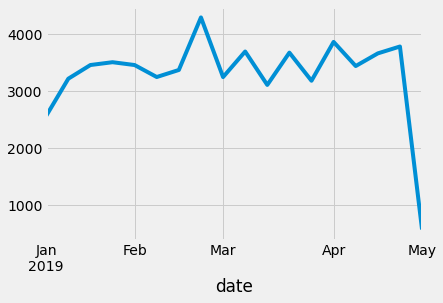

In [253]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
#fixing random state for Repro
#fig,ax - plt.subplots(figsize = 1,18))

George.plot()